#HW 10 CLUSTERING BUSINESS

#cluster time trends in NYC businesses: 
#DATA
#Census Business data:
##download census data for businesses by ZIP code. the data is here
http://www.census.gov/econ/cbp/download/
##and it can be downloaded by hand. you can also download it with 3 terminal commands as follows: the data from 1993 through 2001 is different in the format of its path than the data after 2001 (that is why more than one for loop is needed)



In [ ]:
$ for ((y=93; y<=99; y+=1)); do wget ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp$y\totals.zip; done

$ for ((y=0; y<=9; y+=1)); do wget ftp://ftp.census.gov/econ200$y\/CBP_CSV/zbp0$y\totals.zip; done

$ for ((y=10; y<=15; y+=1)); do wget ftp://ftp.census.gov/econ20$y\/CBP_CSV/zbp$y\totals.zip; done


#NYC zip codes shape file is here
##http://data.nycprepared.org/dataset/nyc-zip-code-tabulation-areas/resource/0c0e14e9-78e1-404e-97b0-c2fabceb3981


NOTES: 
to read in a zip file without unzipping it you can use the pandas and zipfile packages

In [ ]:
import pandas as pd

import zipfiles #i am not giving it a name cause i intend to use it only once

zf = zipfile.ZipFile(fname)
df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))



you may need to clean your data: for some NYC zip codes there may be no info
    
sanity check: you should have 20 (Ntimestamps) datapoints per time series and about 250 zipcodes (Nzipcodes)

IMPORTANT: we talked about the importance of "whitening" your data: dividing each feature by its standard deviation. 
Whitenings decorrelates the data: it makes the features independent so that the data covariance matrix is the identity matrix.
Whitening your data in time series analysis is in most cases **wrong**: you are modifying your time behaviour. This is because of the strong correlation between features (two consecutive time stamps for the same observation, the same zip code here, are strongly correlated). Here instead you want to standardize your time series: subtract the mean and divide each time series (separately) by its standard deviation. As a sanity check (if you use skitlearn Kmeans or skitlearns kmeans2): you want your data array to be shaped Nzipcodes x Ntimestamps

mydata.shape should be (Nzipcodes, Ntimestamps)

mydata[i].std() shoould be 1 for all i in range(len(Nzipcodes))

mydata[i].mean() should be ~0 for all i in range(len(Nzipcodes))



In [ ]:
#import lib
import pandas as pd
import geopandas as gp

In [11]:
#import data
data = gp.read_file('nyc-zip-code-tabulation-areas-polygons.geojson')
print data

                                                   @id  BLDGpostalCode  \
0    http://nyc.pediacities.com/Resource/PostalCode...               0   
1    http://nyc.pediacities.com/Resource/PostalCode...               0   
2    http://nyc.pediacities.com/Resource/PostalCode...               0   
3    http://nyc.pediacities.com/Resource/PostalCode...               0   
4    http://nyc.pediacities.com/Resource/PostalCode...               0   
5    http://nyc.pediacities.com/Resource/PostalCode...               0   
6    http://nyc.pediacities.com/Resource/PostalCode...               0   
7    http://nyc.pediacities.com/Resource/PostalCode...               0   
8    http://nyc.pediacities.com/Resource/PostalCode...               0   
9    http://nyc.pediacities.com/Resource/PostalCode...               0   
10   http://nyc.pediacities.com/Resource/PostalCode...               0   
11   http://nyc.pediacities.com/Resource/PostalCode...               0   
12   http://nyc.pediacities.com/Resour

In [18]:
#potal codes to zip
d = pd.DataFrame()
d['zip'] = data['postalCode']

In [19]:
#drop non values
d['zip'] = d['zip'].astype(int).drop_duplicates()

<type 'numpy.float64'>


In [21]:
#write to list

datafile = {}
datafile = pd.DataFrame({'zip': d['zip']}).drop_duplicates()

In [22]:
#put in loop to collect between data 94,98
i = 0

for i in xrange(94, 98):
    filename = 'zbp%02dtotals.zip' %i
    print filename
    zf = zipfile.ZipFile(filename)
    df = pd.read_csv(zf.open(filename.replace('.zip'))
    
#print
print datafile.head()


zbp94totals.zip
zbp95totals.zip
zbp96totals.zip
zbp97totals.zip

     zip  1994  1995  1996  1997
0  11372  1229  1236  1292  1309
1  11004   194   188   176   192
2  11040  1422  1414  1335  1344
3  11426   326   219   209   198
4  11365   492   476   483   522
(262, 12)


KeyError: 47L

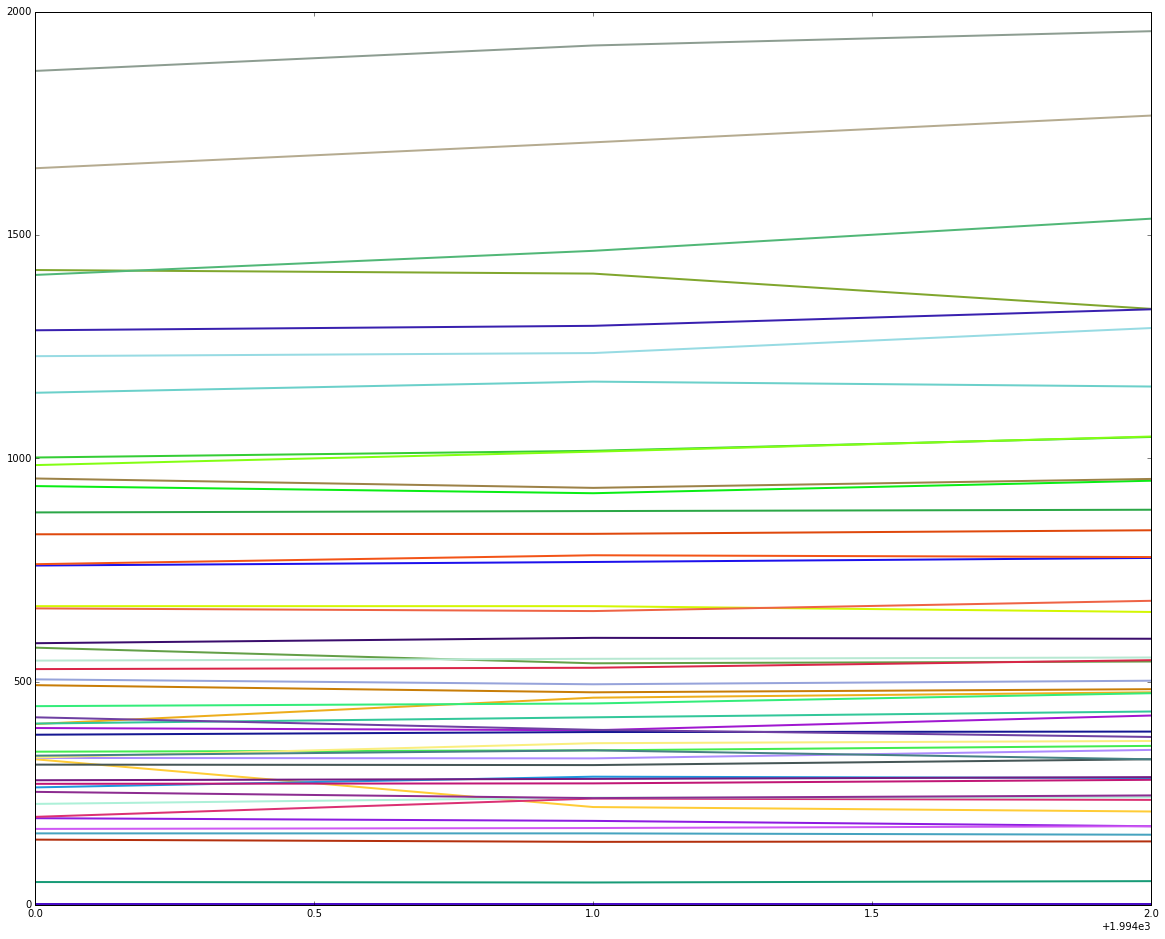

In [51]:
# it gıves error, I did not deal with it

plt.title('Zip Business', fontsize = 12)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

a = 0
b = 0

x = []
y = []

cx = 0 

plt.figure(figsize=(20, 16))
plt.plot(x, y, c = cx, linewidth = 2)

In [54]:
#libraries
import numpy as np
%pylab inline
import sklearn
import sklearn.cluster

Populating the interactive namespace from numpy and matplotlib


In [66]:
#I wrıte the cluster algorıtm for 3,5,7 but because of the prevıous one ıt gıves error

r3 = sklearn.cluster.KMeans(n_clusters=3).fit(matrix)
plt.figure(figsize=(20, 16))
for i in range(3):
    plt.plot(x, matrix[r3.labels == i].transpose(), alpha=.80)

ValueError: invalid __array_struct__

In [67]:
#5
r5 = sklearn.cluster.KMeans(n_clusters=5).fit(matrix)
plt.figure(figsize=(20, 16))
for i in range(5):
    plt.plot(x, matrix[r3.labels == i].transpose(), alpha=.80)

ValueError: invalid __array_struct__

In [68]:
#7

r7 = sklearn.cluster.KMeans(n_clusters=7).fit(matrix)
plt.figure(figsize=(20, 16))
for i in range(7):
    plt.plot(x, matrix[r3.labels == i].transpose(), alpha=.80)

ValueError: invalid __array_struct__

In [1]:
#ıt shows us to clusters on map because of the previous problem I did not get the map
datafile['lab'] = r3.labels
mapfile = datafilemap.merge(datafile, on = 'zip')

print datafilemap.head()

NameError: name 'r3' is not defined